In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV


In [15]:
from datetime import datetime

def log(msg):
    f = open("log.txt", "a")
    f.write("\n")
    f.write("==============================================")
    f.write("\n")
    for line in msg:
        f.write(line)
        f.write("\n")
    f.close()
    
log_data= [datetime.now().strftime("%d/%m/%Y, %H:%M:%S")]
log_data.append("elastic_net")
log_data.append("")


In [16]:
df = pd.read_csv('processed_data.csv')
print(df.head(10))

   P conc. (mg/kg)  K conc. (mg/kg)  Chlorophyll-a       4       5       6  \
0           3620.0          58360.0           44.0  0.9707  0.9546  0.9384   
1           3506.0          51290.0           42.1  1.3097  1.2930  1.2722   
2           3036.0          51420.0           39.4  1.9541  1.9210  1.8844   
3           4576.0          43325.0           47.9  1.4033  1.3937  1.3833   
4           4012.0          40245.0           48.6  0.7786  0.7727  0.7686   
5           4619.0          40521.0           45.1  2.0162  1.9847  1.9507   
6           4514.0          45712.0           41.6  1.3164  1.2872  1.2557   
7           5455.0          41235.0           45.6  1.0908  1.0700  1.0465   
8           4304.0          44213.0           42.6  1.2809  1.2643  1.2464   
9           4919.0          35530.0           39.9  1.9447  1.9289  1.9158   

        7       8       9      10  ...    2144     2145     2146     2147  \
0  0.9260  0.9167  0.9099  0.9091  ...  8.8199   9.4612   9.9928

In [17]:
scaler = StandardScaler()

X = df.iloc[: , 3:]

print(X)

Y = df['Chlorophyll-a']
Y1 = df['P conc. (mg/kg)']
Y2 = df['K conc. (mg/kg)']

          4       5       6       7       8       9      10      11      12  \
0    0.9707  0.9546  0.9384  0.9260  0.9167  0.9099  0.9091  0.9135  0.9226   
1    1.3097  1.2930  1.2722  1.2524  1.2341  1.2178  1.2069  1.2011  1.2002   
2    1.9541  1.9210  1.8844  1.8523  1.8266  1.8103  1.7965  1.7856  1.7809   
3    1.4033  1.3937  1.3833  1.3735  1.3650  1.3584  1.3551  1.3545  1.3548   
4    0.7786  0.7727  0.7686  0.7614  0.7543  0.7506  0.7459  0.7412  0.7405   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
163  2.8373  2.8121  2.7745  2.7324  2.6934  2.6653  2.6464  2.6346  2.6231   
164  3.3757  3.3207  3.2677  3.2207  3.1806  3.1482  3.1351  3.1338  3.1205   
165  1.1296  1.0905  1.0720  1.0474  1.0316  1.0402  1.0498  1.0567  1.0534   
166  2.6838  2.6354  2.5857  2.5579  2.5366  2.5048  2.5052  2.5289  2.5429   
167  2.5029  2.4714  2.4522  2.4273  2.4044  2.3904  2.3790  2.3722  2.3832   

         13  ...     2144     2145     2146     214

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.4, random_state=101)

X_train, X_test, y1_train, y1_test = train_test_split(
    X, Y1, test_size=0.4, random_state=101)

X_train, X_test, y2_train, y2_test = train_test_split(
    X, Y2, test_size=0.4, random_state=101)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


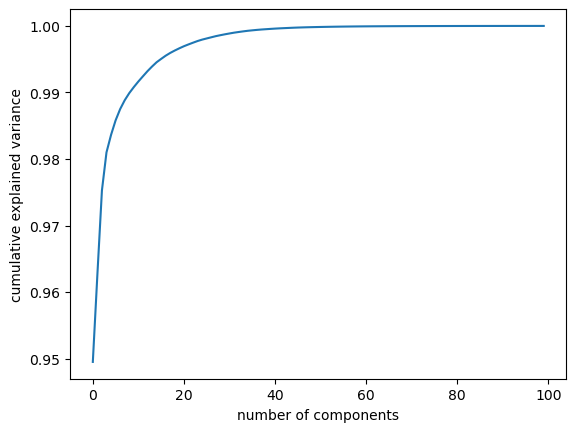

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_train_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

num_components = 5
pca = PCA(n_components=num_components)

X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)

In [20]:
# # Create the random grid
# random_grid = {"max_iter": [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 100],
#                 "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
#                 "l1_ratio": np.arange(0.0, 1.0, 0.1)}
# grid_ridge_performance = GridSearchCV(ElasticNet(), param_grid = random_grid, scoring = 'r2')
# grid_ridge_performance.fit(X_train_scaled, y_train)
# grid_ridge_performance.best_params_

In [21]:
model = ElasticNet(alpha= 10, l1_ratio= 0.1, max_iter= 20)
model.fit(X_train_scaled,y_train)

model2 = ElasticNet(alpha= 10, l1_ratio= 0.7, max_iter= 10)
model2.fit(X_train_scaled,y1_train)

model3 = ElasticNet(alpha= 100, l1_ratio= 0.8, max_iter= 40)
model3.fit(X_train_scaled,y2_train)

ElasticNet(alpha=100, l1_ratio=0.8, max_iter=40)

In [22]:
predictions = model.predict(X_test_scaled)
predictions1 = model2.predict(X_test_scaled)
predictions2 = model3.predict(X_test_scaled)



In [23]:
chlo_score = r2_score(y_test, predictions)
chlor_mean_err = mean_squared_error(y_test, predictions)
log_data.append("R square of Chlorophyll-a: " +str(chlo_score))
log_data.append("Mean squared error of Chlorophyll-a: " +str(chlor_mean_err))

p_score = r2_score(y1_test, predictions1)
p_mean_err = mean_squared_error(y1_test, predictions1)
log_data.append("R square of P: " + str(p_score))
log_data.append("Mean squared error of P: " +str(p_mean_err))

k_score = r2_score(y2_test, predictions2)
k_mean_err = mean_squared_error(y2_test, predictions2)
log_data.append("R square of K: " + str(k_score))
log_data.append("Mean squared error of K: " +str(k_mean_err))


print('R square of Chlorophyll-a: ', chlo_score,)
print('R square of P: ', p_score,)
print('R square of K: ', k_score,)
print('Mean squared error of Chlorophyll-a: ', chlor_mean_err,)
print('Mean squared error of P: ', p_mean_err,)
print('Mean squared error of K: ', k_mean_err,)



R square of Chlorophyll-a:  -0.027526165012052184
R square of P:  0.03917415329001428
R square of K:  -0.05205229581348281
Mean squared error of Chlorophyll-a:  10.294147776583404
Mean squared error of P:  688853.740293979
Mean squared error of K:  107394812.75765182


In [24]:
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

In [25]:
chlo_mean_abs_err = mape(y_test, predictions)
p_mean_abs_err = mape(y1_test, predictions1)
k_mean_abs_err = mape(y2_test, predictions2)
log_data.append("Mean absolute percentage error of Chlorophyll-a: " +str(chlo_mean_abs_err))
log_data.append("Mean absolute percentage error of P: " +str(p_mean_abs_err))
log_data.append("Mean absolute percentage error of K: " +str(k_mean_abs_err))


print('Mean absolute percentage error of Chlorophyll-a: ', chlo_mean_abs_err)
print('Mean absolute percentage error of P: ', p_mean_abs_err)
print('Mean absolute percentage error of K: ', k_mean_abs_err)

Mean absolute percentage error of Chlorophyll-a:  0.06317813700165165
Mean absolute percentage error of P:  0.16697207249340854
Mean absolute percentage error of K:  0.25329368845884065


In [26]:
log(log_data)